In [23]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error,accuracy_score
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore') 

In [24]:
import seaborn as sns
sns.set(style="whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline 

In [25]:
glass_data = pd.read_csv('glass.csv')
glass_data.head() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [26]:
glass_data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [27]:
glass_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [28]:
glass_data.describe() 

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


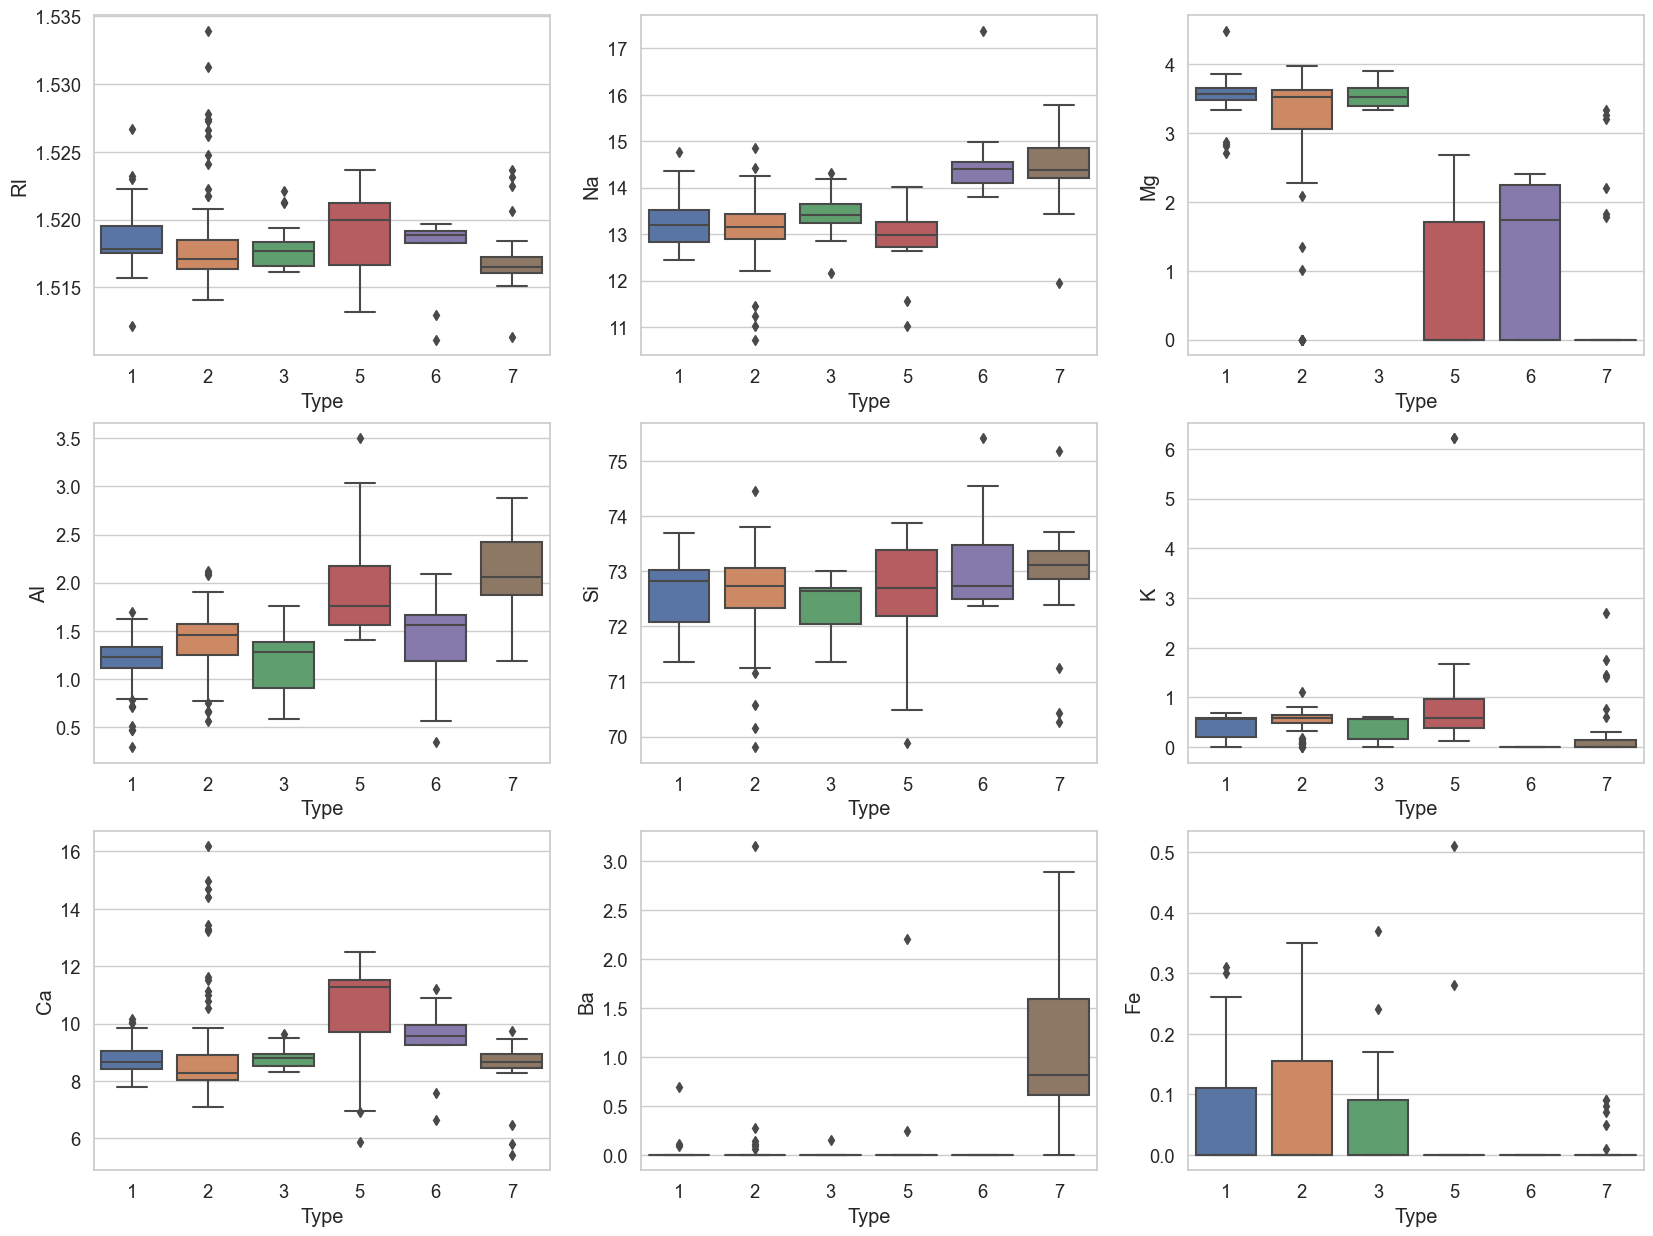

In [29]:
sns.set(style="whitegrid", font_scale=1.2) 
plt.subplots(figsize = (20,15))
plt.subplot(3,3,1) 
sns.boxplot(x='Type', y='RI', data=glass_data)
plt.subplot(3,3,2)
sns.boxplot(x='Type', y='Na', data=glass_data)
plt.subplot(3,3,3) 
sns.boxplot(x='Type', y='Mg', data=glass_data)
plt.subplot(3,3,4)
sns.boxplot(x='Type', y='Al', data=glass_data)
plt.subplot(3,3,5)
sns.boxplot(x='Type', y='Si', data=glass_data)
plt.subplot(3,3,6)
sns.boxplot(x='Type', y='K', data=glass_data)
plt.subplot(3,3,7)
sns.boxplot(x='Type', y='Ca', data=glass_data)
plt.subplot(3,3,8)
sns.boxplot(x='Type', y='Ba', data=glass_data)
plt.subplot(3,3,9)
sns.boxplot(x='Type', y='Fe', data=glass_data)
plt.show() 




In [30]:
features = glass_data.columns[:-1].tolist()
from collections import Counter 

In [34]:
def find(glass_data):
    
    outlier_indices = []
    
    
    for col in glass_data.columns.tolist():
        
        Q1 = np.percentile(glass_data[col], 25)
        
        
        Q3 = np.percentile(glass_data[col],75)
        
        
        IQR = Q3 - Q1
        
        
        outlier_step = 1.5 * IQR 
        
        
        outlier_list_col = glass_data[(glass_data[col] < Q1 - outlier_step) | (glass_data[col] > Q3 + outlier_step )].index
        
        
        outlier_indices.extend(outlier_list_col) 
        
        
        outlier_indices = Counter(outlier_indices)
        multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )
        
        
        return multiple_outliers 
    
    print('This set of data contains %d observations with more than 2 outliers' %(len(find(glass_data[features])))) 
    

In [ ]:
sns.set(style="whitegrid")
plt.subplots(figsize = (10,8))
sns.countplot('Type',data=glass_data).set_title('Glass Type') 

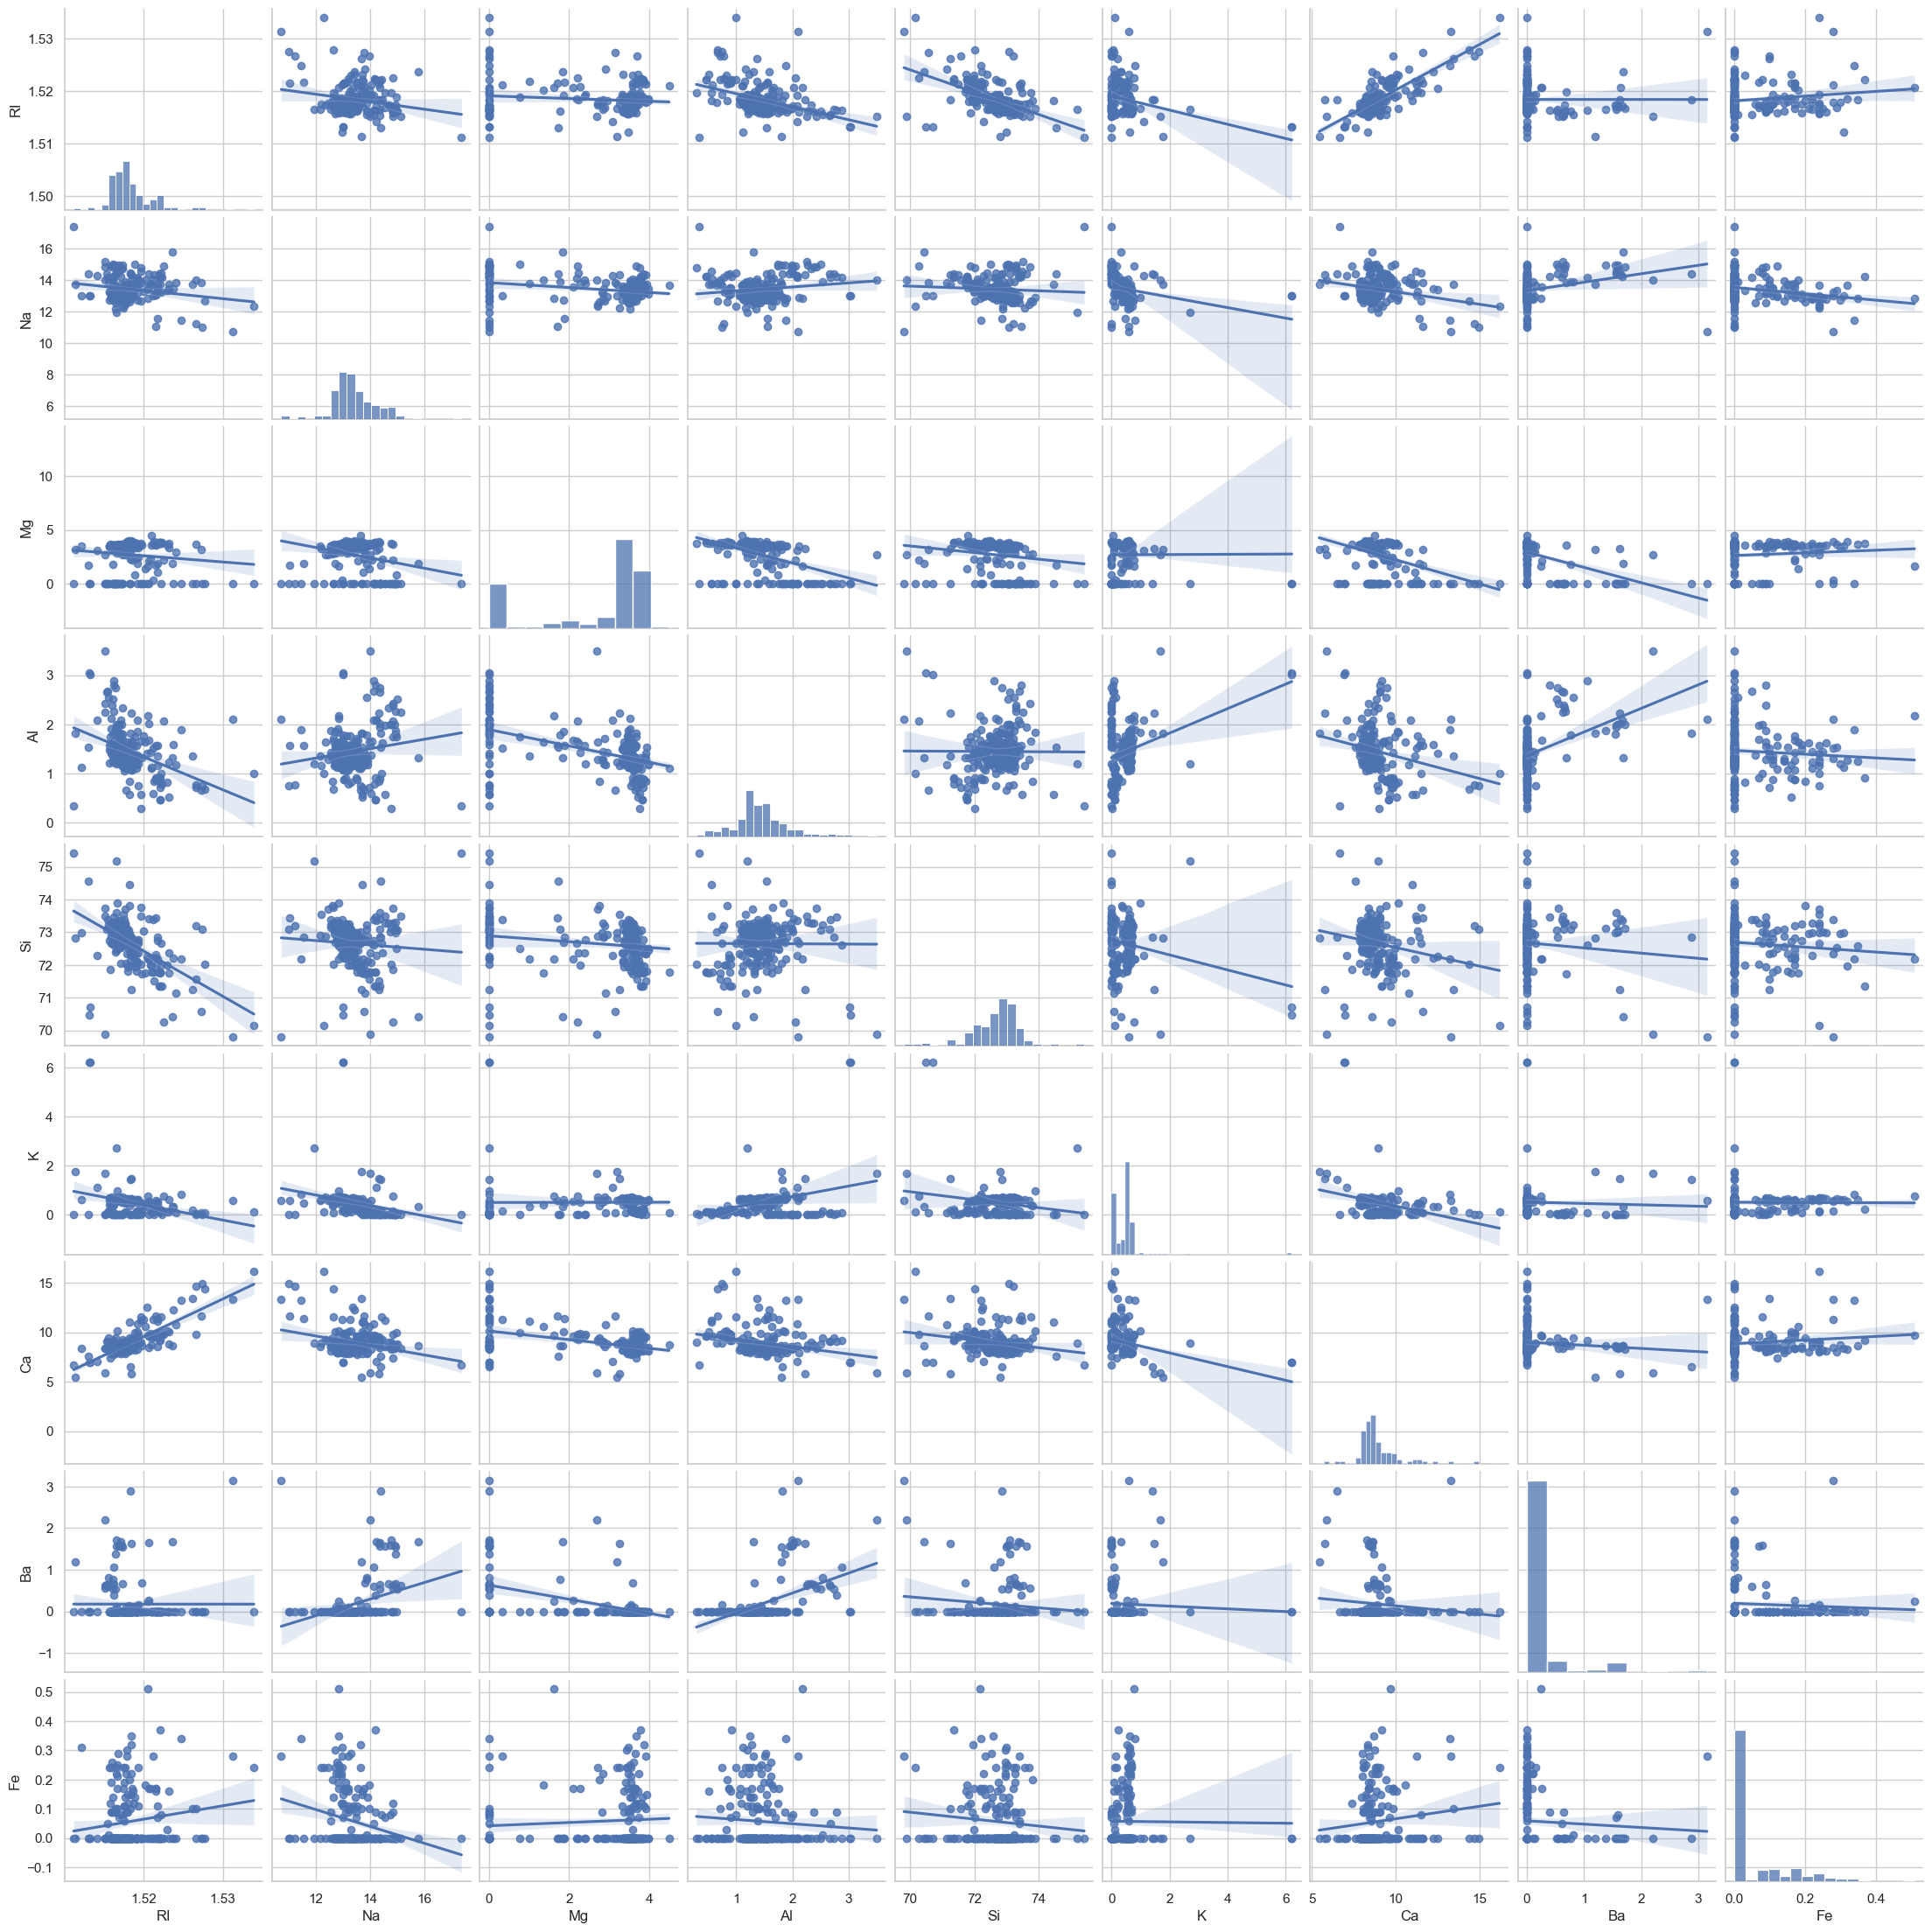

In [39]:
sns.pairplot(glass_data[features], kind='reg') 

<Axes: >

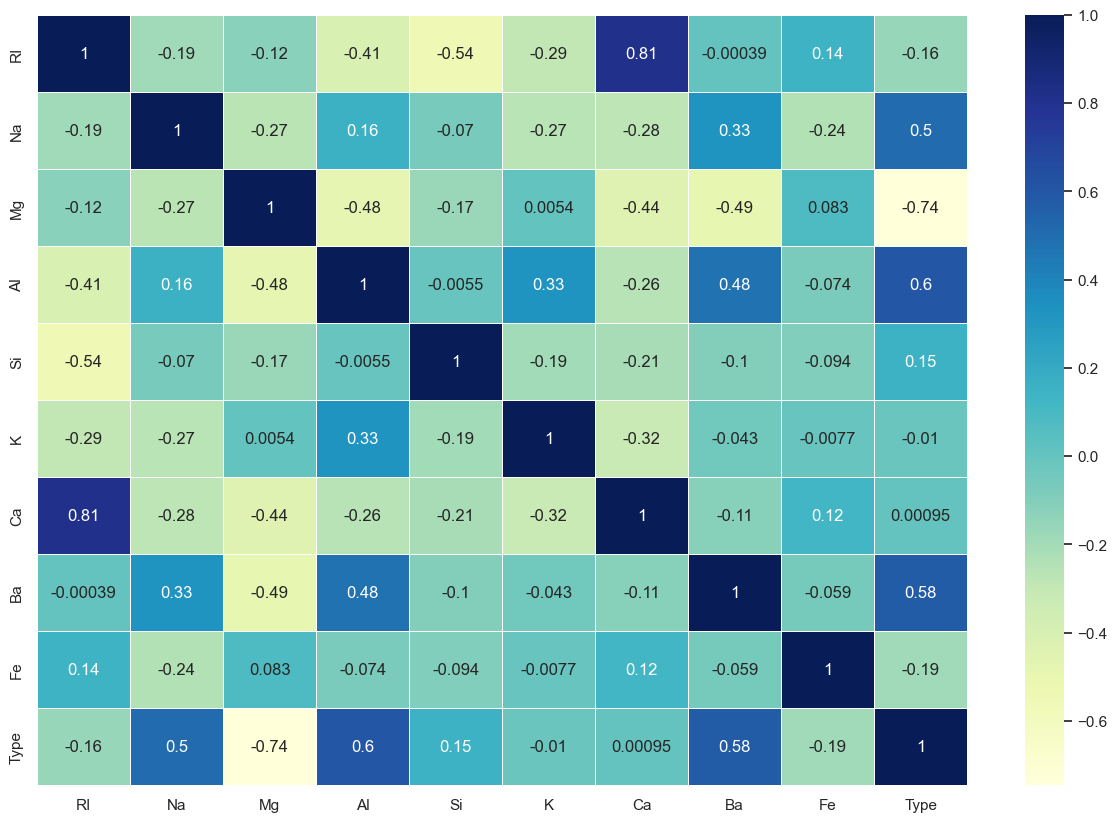

In [40]:
plt.subplots(figsize=(15,10))
sns.heatmap(glass_data.corr(),cmap='YlGnBu',annot=True, linewidth=.5) 

In [41]:
X = glass_data.drop("Type", axis = 1).values
y = glass_data["Type"].values.reshape(-1,1) 

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42) 

In [43]:
print(np.unique(y_train)) 
print(np.unique(y_test)) 

[1 2 3 5 6 7]
[1 2 3 5 6 7]


In [44]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ",X_test.shape)


Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)
Shape of X_train:  (149, 9)
Shape of X_test:  (65, 9)


In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics 

In [47]:
logReg = LogisticRegression(max_iter = 5000)
logReg.fit(X_train, y_train)
logReg.score(X_train, y_train) 
logReg.score(X_test, y_test)
y_pred_LR = logReg.predict(X_test) 

In [48]:
print('Accuracy of Logistic Regression Model:' ,metrics.accuracy_score(y_test,y_pred_LR)) 


Accuracy of Logistic Regression Model: 0.676923076923077


In [49]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train) 
rfc.score(X_train, y_train)
rfc.score(X_test, y_test)
y_pred_rfc = rfc.predict(X_test) 

In [50]:
print('Accuracy of Random Forest Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_rfc)) 

Accuracy of Random Forest Classifier Model: 0.7692307692307693


In [53]:
DecTree = DecisionTreeClassifier()
DecTree.fit(X_train, y_train)
y_pred_DT = DecTree.predict(X_test) 

In [54]:
print('Accuracy of DecisionTreeClassifier Model:' ,metrics.accuracy_score(y_test,y_pred_DT)) 

Accuracy of DecisionTreeClassifier Model: 0.676923076923077


In [55]:
svm = SVC()
svm.fit(X_train,y_train)
y_pred_svm = svm.predict(X_test) 

In [56]:
print('Accuracy of Support Vector Model:' ,metrics.accuracy_score(y_test,y_pred_svm)) 

Accuracy of Support Vector Model: 0.35384615384615387


In [57]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
gnb.score(X_train, y_train)
gnb.score(X_test, y_test)
y_pred_gnb = gnb.predict(X_test)

In [58]:
print('Accuracy of Gaussian Naive Bayes Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_gnb))  

Accuracy of Gaussian Naive Bayes Classifier Model: 0.3076923076923077


In [59]:
gfc=GradientBoostingClassifier(n_estimators= 1000, max_leaf_nodes= 4, max_depth=None,random_state= 2,min_samples_split= 5)
gfc.fit(X_train,y_train)
gfc.score(X_train, y_train)
gfc.score(X_test, y_test)
y_pred_gfc = gfc.predict(X_test) 

In [60]:
print('Accuracy of Gradient Boosting Classifier Model:' ,metrics.accuracy_score(y_test,y_pred_gfc))

Accuracy of Gradient Boosting Classifier Model: 0.7538461538461538


In [ ]:
pd.DataFrame([['Logistic Regression',metrics.accuracy_score(y_test,y_pred_LR)],['Gradient Boost Classifier',metrics.accuracy_score(y_test,y_pred_gfc)],['Decision Tree',metrics.accuracy_score(y_test,y_pred_DT)],['Random Forest Classifier',metrics.accuracy_score(y_test,y_pred_rfc)],['Gaussian Naive Bayes',metrics.accuracy_score(y_test,y_pred_gnb)],Columns==['Model','Accuracy']]) 

In [79]:
import pickle
filename = 'final_glass_prediction_model.pkl'
pickle.dump(gfc, open(filename, 'wb'))
final_model = pickle.load(open(filename, 'rb'))
result = final_model.score(X_test, y_test) 
print(result) 

0.7538461538461538


In [80]:
print("The accuracy of the final model is:- ", result*100,'%') 

The accuracy of the final model is:-  75.38461538461539 %
